In [11]:
%matplotlib inline
import time
start_time = time.time()
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np
from scipy import ndimage 
from scipy.stats import moment
import random
from sklearn.decomposition import PCA


In [16]:
def Momentos(canal, momentos, features, n):
    for l in range(momentos):
        features[ojos[n]].append(moment(canal.reshape(rows*cols), moment=l + 1))
        return(features)

def MomentosEspaciales(canal, momentos, features, n):
    win_mean = ndimage.uniform_filter(canal, (win_rows, win_cols))
    win_sqr_mean = ndimage.uniform_filter(canal**2, (win_rows, win_cols))
    win_var = win_sqr_mean - win_mean**2
    for l in range(momentos):
        features[ojos[n]].append(moment(canal.reshape(rows*cols), moment=l + 1))
    return(win_var, features)

def MomentosDerivadas(imagen, momentos, features, n):
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(imagen_gris, 13)
    features = Momentos(laplacian, momentos, features, n)
    sobelx = cv2.Sobel(imagen_gris, cv2.CV_64F, 1, 0, ksize=31)
    features = Momentos(sobelx, momentos, features, n)
    sobely = cv2.Sobel(imagen_gris, cv2.CV_64F, 0, 1, ksize=31)
    features = Momentos(sobely, momentos, features, n)
    edges = cv2.Canny(imagen,10,50)
    features = Momentos(edges, momentos, features, n)
 
    
    fig=plt.figure(figsize=(6, 12))
    fig.add_subplot(1, 5, 1)
    plt.title(str(ojos[n])+ '       danio: ' + str(y[n])+ 'numero'+ str(n))
    plt.imshow(laplacian)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    fig.add_subplot(1, 5, 2)
    plt.imshow(sobelx)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    fig.add_subplot(1, 5, 3)
    plt.imshow(sobely)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    fig.add_subplot(1, 5, 4)
    plt.imshow(edges)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    fig.add_subplot(1, 5, 5)
    plt.imshow(imagen)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.show()
    return(features)



def EigenFoo(canal, n_vals, features, n):
    r_s =sp.csc_matrix(canal).asfptype()
    vals = sp.linalg.eigs(r_s, k=n_vals, which='LM',return_eigenvectors=False , tol=tolerancia)
    vals = np.abs(vals)
    for l in vals:
        features[ojos[n]].append(l)
    vals = sp.linalg.eigs(r_s, k=n_vals, which='SM',return_eigenvectors=False , tol= tolerancia)
    vals = np.abs(vals)
    for l in vals:
        features[ojos[n]].append(l)
    return(features)

def MainRGB(ojos, n, features):
    print(i)
    ojo = cv2.imread(ojos[n])
     # filtros direccionales
    features = MomentosDerivadas(ojo, momentos, features, n)
    ## TRABAJO EN ESPACIO RGB
    # division en canales 
    b,g,r = cv2.split(ojo)       # get b,g,r
    # eliminacion de pixeles negros
    mask = r< 5
    r[mask] = 255 
    r = cv2.medianBlur(r, 5)
    #calculo de momentos
    #momentos del canal natural en r
    features = Momentos(r, momentos ,features, n)
    #features = EigenFoo(r, n_vals, features, n)
    #print('first eiegen')
    mask = g< 5
    g[mask] = 255 
    g = cv2.medianBlur(g,5)
    #momentos del canal natural en green
    features = Momentos(g, momentos, features, n)
    #features = EigenFoo(g, n_vals, features, n)
    #print('2 eiegen')
    mask = b< 5
    b[mask] = 255 
    b = cv2.medianBlur(b, 5)
    #momentos del canal natural en blue
    features = Momentos(b, momentos, features, n)
    #features = EigenFoo(b, n_vals, features, n)
    #print('3 eiegen')
        #momentos del canal despues del filtro de correlacion espacial
    var_r, features = MomentosEspaciales(r, momentos, features, n )
    var_g, features = MomentosEspaciales(g, momentos, features, n )
    var_b, features = MomentosEspaciales(b, momentos, features, n )
    #features = EigenFoo(var_r, n_vals, features, n)
    #print('4 eiegen')
    #features = EigenFoo(var_g, n_vals, features, n)
    #print('5 eiegen')
    #features = EigenFoo(var_b, n_vals, features, n)
    #print('6 eiegen')
    fig=plt.figure(figsize=(6, 12))
    fig.add_subplot(1, 4, 1)
    plt.title(str(ojos[n])+ '       danio: ' + str(y[n])+ 'numero'+ str(n))
    plt.imshow(var_r)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    fig.add_subplot(1, 4, 2)
    plt.imshow(var_g)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    fig.add_subplot(1, 4, 3)
    plt.imshow(var_b)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    ojo = cv2.merge([r,g,b])
    fig.add_subplot(1, 4, 4)
    plt.imshow(ojo)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.show()
    return(features)

def MainHSV(ojos, n, features):
    print(i)
    ojo = cv2.imread(ojos[n])
    hsv = cv2.cvtColor(ojo, cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(hsv)

     # filtros direccionales
    features = MomentosDerivadas(hsv, momentos, features, n)
    ## TRABAJO EN ESPACIO HSV
    # division en canales 
    #calculo de momentos
    #momentos del canal natural en r
    features = Momentos(h, momentos ,features, n)
    features = Momentos(s, momentos, features, n)
    features = Momentos(v, momentos, features, n)
    var_r, features = MomentosEspaciales(h, momentos, features, n )
    var_g, features = MomentosEspaciales(s, momentos, features, n )
    var_b, features = MomentosEspaciales(v, momentos, features, n )
    fig=plt.figure(figsize=(6, 12))
    fig.add_subplot(1, 4, 1)
    plt.title(str(ojos[n])+ '       danio: ' + str(y[n])+ 'numero'+ str(n))
    plt.imshow(var_r)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    fig.add_subplot(1, 4, 2)
    plt.imshow(var_g)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    fig.add_subplot(1, 4, 3)
    plt.imshow(var_b)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    #ojo = cv2.merge([r,g,b])
    fig.add_subplot(1, 4, 4)
    plt.imshow(ojo)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.show()
    return(features)

def MainPCA(ojos, n, features):
    print(n)
    ojo = cv2.imread(ojos[n])
    b,g,r = cv2.split(ojo)
    r_v = r.reshape((1378**2,1))
    g_v = g.reshape((1378**2,1))
    b_v = b.reshape((1378**2,1))
    data = np.hstack([r_v, g_v, b_v])
    pca = PCA(n_components=3, ).fit((data))
    for i in pca.explained_variance_:
        features[ojos[n]].append(i)
    numeros = pca.transform(data)
    rota = (numeros - np.min(numeros))/(np.max(numeros)-np.min(numeros))
    rota = np.round(rota)*255
    r_v = rota[:, 0].reshape((1378, 1378))
    g_v = rota[:, 1].reshape((1378, 1378))
    b_v = rota[:, 2].reshape((1378, 1378))
    fig=plt.figure(figsize=(6, 12))
    fig.add_subplot(1, 4, 1)
    plt.title(str(ojos[n])+ '       danio: ' + str(y[n])+ 'numero'+ str(n))
    plt.imshow(r_v, cmap='gray')
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    fig.add_subplot(1, 4, 2)
    plt.imshow(g_v, cmap='gray')
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    fig.add_subplot(1, 4, 3)
    plt.imshow(b_v, cmap='gray')
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    ojo = cv2.merge([r,g,b])
    fig.add_subplot(1, 4, 4)
    plt.imshow(ojo)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.show()
     # filtros direccionales
    features = MomentosDerivadas(ojo, momentos, features, n)
    ## TRABAJO EN ESPACIO PCA
    features = Momentos(r_v, momentos ,features, n)
    features = Momentos(g_v, momentos, features, n)
    features = Momentos(b_v, momentos, features, n)
    var_r, features = MomentosEspaciales(r_v, momentos, features, n )
    var_g, features = MomentosEspaciales(g_v, momentos, features, n )
    var_b, features = MomentosEspaciales(b_v, momentos, features, n )
    fig=plt.figure(figsize=(6, 12))
    fig.add_subplot(1, 4, 1)
    plt.title(str(ojos[n])+ '       danio: ' + str(y[n])+ 'numero'+ str(n))
    plt.imshow(var_r)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    fig.add_subplot(1, 4, 2)
    plt.imshow(var_g)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    fig.add_subplot(1, 4, 3)
    plt.imshow(var_b)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.xlabel('')
    ojo = cv2.merge([r,g,b])
    fig.add_subplot(1, 4, 4)
    plt.imshow(ojo)
    plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
    plt.show()
    return(features)


In [17]:
np.random.seed(0)
experimento = 5
index = random.sample(list(range(1200)), experimento)
index = list(map(lambda x: int(x), index))
index = np.array(index)
from scipy import sparse as sp
# parametros
#n_vals = 10
#tolerancia = 10

momentos = 11 #numero de momentos estimados
win_rows, win_cols = 27, 27 #tamanio de la ventana
os.chdir('C:\\Users\\fou-f\\Desktop\\CD2EDUARDOFOO\\Retina\\DataETL')
y = pd.read_csv('C:\\Users\\fou-f\\Desktop\\CD2EDUARDOFOO\\Retina\\Code\\metadata.csv')
y = y['y']
y = list(map(lambda x: int(x), y))
y = np.array(y)
y= y[index]
ojos = os.listdir()
ojos = [ojos[i] for i in index ]
rows, cols = 1378, 1378       #dimension de la imagen
features = dict()
for i in ojos:
    features[str(i)] = list()
n = 0


0


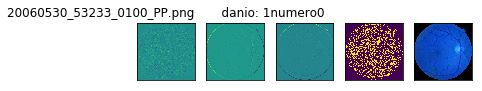

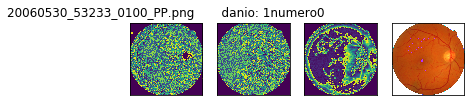

1


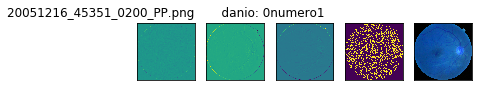

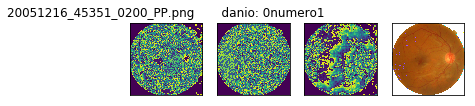

2


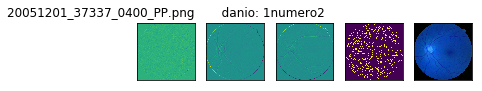

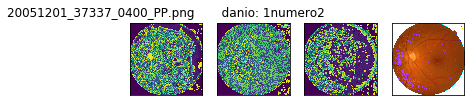

3


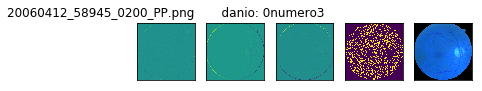

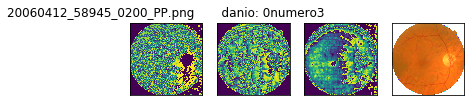

4


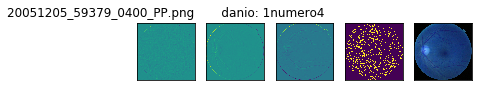

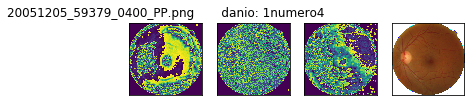

In [18]:
for i in range(len(ojos)):
    features = MainRGB(ojos, i, features)


0


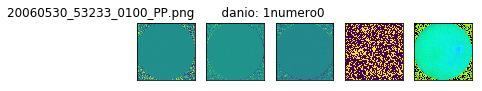

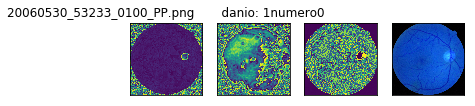

1


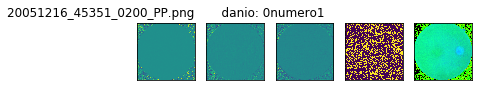

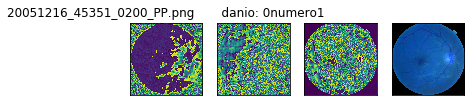

2


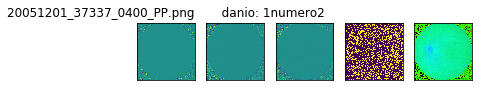

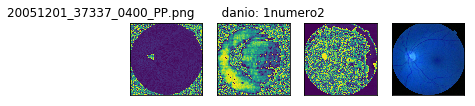

3


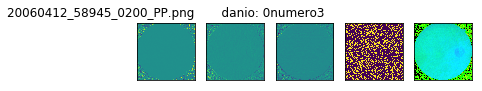

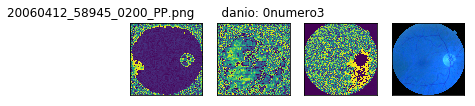

4


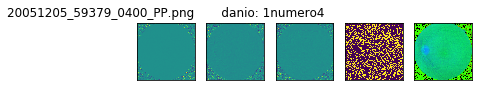

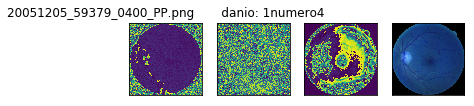

In [19]:
for i in range(len(ojos)):
    features = MainHSV(ojos, i, features)


0


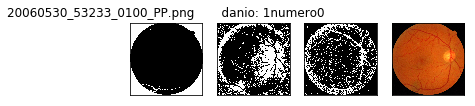

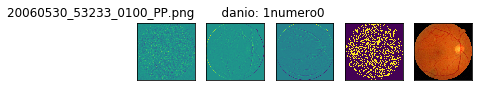

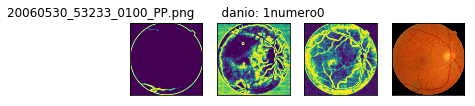

1


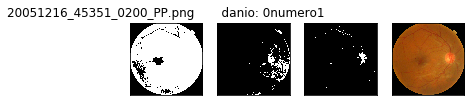

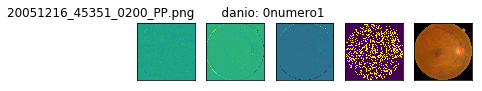

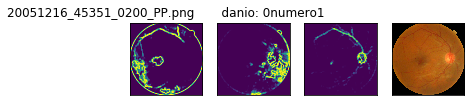

2


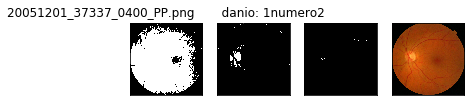

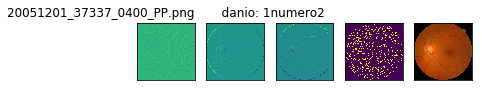

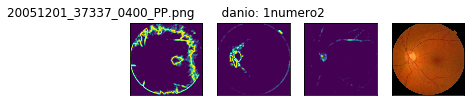

3


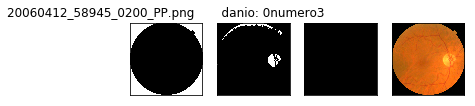

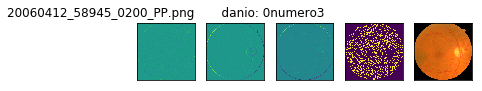

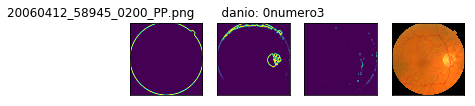

4


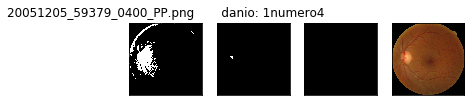

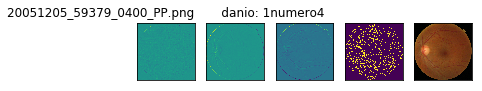

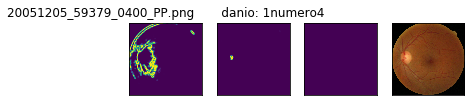

In [20]:
for i in range(len(ojos)):
    features = MainPCA(ojos, i, features)


In [4]:
#data = pd.read_csv('C:\\Users\\fou-f\\Desktop\\CD2EDUARDOFOO\\Retina\\Resultados\\emALLw81m11All.csv')
#data.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,113,114,115,116,117,118,119,120,121,122
count,1200.000000,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,1.200000e+03,...,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03
mean,599.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.194898e-16,...,4.741578e-16,-6.434668e-16,5.892509e-16,2.615500e-16,-2.701543e-16,-8.087975e-16,6.990704e-16,-2.489675e-16,-4.241977e-16,7.679043e-18
std,346.554469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000417e+00,...,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.697995e+00,...,-4.672097e-01,-5.587785e-01,-5.729473e-01,-5.875577e-01,-6.028697e-01,-6.047625e-01,-6.107237e-01,-6.121179e-01,-6.147929e-01,-6.163521e-01
25%,299.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.084304e-01,...,-4.672097e-01,-5.587785e-01,-5.729473e-01,-5.875577e-01,-6.028697e-01,-6.047625e-01,-6.107237e-01,-6.121179e-01,-6.147929e-01,-6.163521e-01
50%,599.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.272319e-01,...,-4.622074e-01,-5.490477e-01,-5.624850e-01,-5.745688e-01,-5.879914e-01,-5.878427e-01,-5.917974e-01,-5.911737e-01,-5.917972e-01,-5.912776e-01
75%,899.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.713346e-01,...,-1.837023e-01,-2.380679e-02,-6.240859e-03,8.382369e-02,1.790563e-01,1.765456e-01,1.735590e-01,1.837082e-01,1.565124e-01,1.716339e-01
max,1199.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.484422e+00,...,4.228825e+00,2.978871e+00,2.721928e+00,2.695823e+00,2.584474e+00,2.536343e+00,2.489934e+00,2.458364e+00,2.435733e+00,2.421438e+00


In [6]:
#dataFrame = pd.DataFrame.from_dict(features, orient='index')
#dataFrame = data

In [7]:
from sklearn.model_selection import train_test_split
dataFrame.shape[1]

124

In [17]:
columnas= []
for i in range(dataFrame.shape[1]):
    columnas.append('X'+str((i+1)))

In [18]:
dataFrame.columns = columnas
dataFrame.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124
count,1200.000000,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,1.200000e+03,...,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03
mean,599.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.194898e-16,...,4.741578e-16,-6.434668e-16,5.892509e-16,2.615500e-16,-2.701543e-16,-8.087975e-16,6.990704e-16,-2.489675e-16,-4.241977e-16,7.679043e-18
std,346.554469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000417e+00,...,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.697995e+00,...,-4.672097e-01,-5.587785e-01,-5.729473e-01,-5.875577e-01,-6.028697e-01,-6.047625e-01,-6.107237e-01,-6.121179e-01,-6.147929e-01,-6.163521e-01
25%,299.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.084304e-01,...,-4.672097e-01,-5.587785e-01,-5.729473e-01,-5.875577e-01,-6.028697e-01,-6.047625e-01,-6.107237e-01,-6.121179e-01,-6.147929e-01,-6.163521e-01
50%,599.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.272319e-01,...,-4.622074e-01,-5.490477e-01,-5.624850e-01,-5.745688e-01,-5.879914e-01,-5.878427e-01,-5.917974e-01,-5.911737e-01,-5.917972e-01,-5.912776e-01
75%,899.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.713346e-01,...,-1.837023e-01,-2.380679e-02,-6.240859e-03,8.382369e-02,1.790563e-01,1.765456e-01,1.735590e-01,1.837082e-01,1.565124e-01,1.716339e-01
max,1199.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.484422e+00,...,4.228825e+00,2.978871e+00,2.721928e+00,2.695823e+00,2.584474e+00,2.536343e+00,2.489934e+00,2.458364e+00,2.435733e+00,2.421438e+00


In [19]:
y1 = list(map(lambda x: str(x), y))
y = y1
from sklearn.preprocessing import scale
data_escalado = pd.DataFrame( scale(dataFrame))

In [20]:
train, test, y_train, y_test = train_test_split(data_escalado, y, test_size=0.3, random_state=0) # es importante este detalle para que todos tengamos el mismo resultado
test.describe()

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
count,360.000000,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,0.089834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105761,...,-0.011432,-0.017796,-0.027991,-0.033651,-0.044768,-0.052629,-0.062223,-0.070395,-0.078692,-0.086251
std,1.003761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.072589,...,1.012728,1.043947,1.031313,1.027627,1.016595,1.004571,0.992980,0.981158,0.969995,0.959101
min,-1.727721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.642506,...,-0.467210,-0.558779,-0.572947,-0.587558,-0.602870,-0.604762,-0.610724,-0.612118,-0.614793,-0.616352
25%,-0.718801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.731609,...,-0.467210,-0.558779,-0.572947,-0.587558,-0.602870,-0.604762,-0.610724,-0.612118,-0.614793,-0.616352
50%,0.127017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.014492,...,-0.465787,-0.556011,-0.569971,-0.583862,-0.598635,-0.599946,-0.605335,-0.606153,-0.608243,-0.609209
75%,1.021189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693397,...,-0.315582,-0.268446,-0.263216,-0.206043,-0.169289,-0.154997,-0.111212,-0.105953,-0.095602,-0.109109
max,1.730608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.484422,...,4.186711,2.978871,2.721928,2.695823,2.583991,2.536343,2.489934,2.458364,2.434208,2.421310


# Intento de clasificación 

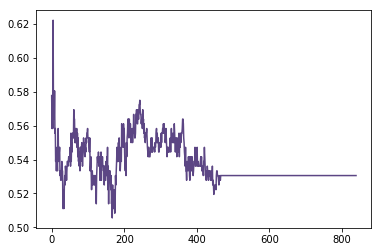

In [21]:
from sklearn.neighbors import KNeighborsClassifier
errores_knn_class = []
for i in range(round(len(train))):
    knn = KNeighborsClassifier(n_neighbors= (i+1))
    knn.fit(train,   y_train) 
    predictions = knn.predict(test)
    prediccionesCorrectas = [predictions == y_test ] 
    accuracy= np.sum(prediccionesCorrectas) / len(predictions)
    errores_knn_class.append(accuracy)
plt.plot(errores_knn_class, c='#5C4684') #el color pantone 2018
errores_knn_class = np.array(errores_knn_class)

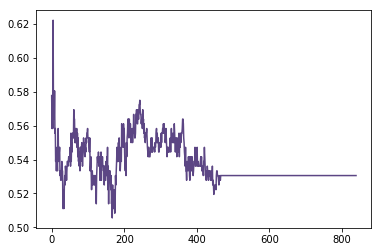

In [22]:
cotaSuperior = 15
errores_knn_class < cotaSuperior
plt.plot(errores_knn_class[errores_knn_class < cotaSuperior] , c='#5C4684') #el color pantone 2018

Dice Uresti que los chidos iban a ser los RF.

In [23]:
from sklearn.ensemble import RandomForestClassifier
acc_RF = []
ite = np.array(list(range(len(train))))
for i in ite:
    if(i % 15== 0):
        trees = i + 1 
        rf = RandomForestClassifier(n_estimators=trees) # inicializamos el clasificador
        rf.fit(train, y_train) #otra linea que nos libra de cuentas
        predictions = rf.predict(test) # otra linea que se agradece
        prediccionesCorrectas=[predictions==y_test] #de nuevo el error consiste en solo contar :D
        accuracy= np.sum(prediccionesCorrectas) / len(predictions)
        acc_RF.append(accuracy)
        print('Presición con Random forest: ' + str(accuracy) + ' con ' + str(trees) +' árboles')


Presición con Random forest: 0.5638888888888889 con 1 árboles
Presición con Random forest: 0.6055555555555555 con 16 árboles
Presición con Random forest: 0.6166666666666667 con 31 árboles
Presición con Random forest: 0.6583333333333333 con 46 árboles
Presición con Random forest: 0.6194444444444445 con 61 árboles
Presición con Random forest: 0.6083333333333333 con 76 árboles
Presición con Random forest: 0.5861111111111111 con 91 árboles
Presición con Random forest: 0.6166666666666667 con 106 árboles
Presición con Random forest: 0.6277777777777778 con 121 árboles
Presición con Random forest: 0.6055555555555555 con 136 árboles
Presición con Random forest: 0.6277777777777778 con 151 árboles
Presición con Random forest: 0.6222222222222222 con 166 árboles
Presición con Random forest: 0.6333333333333333 con 181 árboles
Presición con Random forest: 0.6416666666666667 con 196 árboles
Presición con Random forest: 0.6305555555555555 con 211 árboles
Presición con Random forest: 0.6138888888888889 

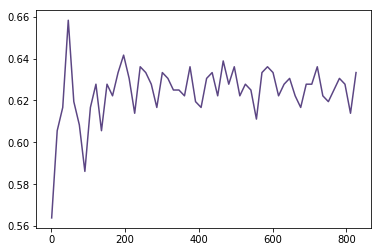

In [29]:
plt.plot((ite[range(len(acc_RF))])*15+1 , acc_RF, c='#5C4684') #el color pantone 2018
acc_RF = np.array(acc_RF)

In [30]:
print("--- %s seconds ---" % (time.time() - start_time))


--- 1191.5902609825134 seconds ---


In [31]:
data_escalado.to_csv('C:\\Users\\fou-f\\Desktop\\CD2EDUARDOFOO\\Retina\\Resultados\\emALLw81m11All.csv')